# **CREDIT CARD DEFAULT PREDICTION**
---



**SUMMARY:**

The dataset contains information on credit card applicants received by a bank over a period of time. The collected application data includes demographic, employment, income, and other relevant information about the applicants.

In order to improve its credit risk management, the bank is seeking a better understanding of its customer base and identifying key drivers of credit risk. These attributes will be evaluated to develop a credit scoring model, enabling better decision-making on applications and mitigating future losses.


## ***SECTION-1***

**QUE1. Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?**

In today's world, where financial transactions are increasingly digital and complex, predicting the likelihood of a customer defaulting on a credit card is crucial for banks. The proposal holds significance for several reasons:

*  Risk management.
*  Predicting customer behaviour.
*  Minimizes legal & administrative expenses.
* Attracting responsible customers and establishing trust in the financial marketplace.

By using predictive models, banks can customize financial solutions for customers based on their credit risk. This personalized approach not only helps keep reliable clients but also strengthens the overall relationship between the bank and its customers. It ensures that individuals receive financial services that match their needs and capabilities, fostering trust and satisfaction.


**QUE 2. How is it going to impact the banking sector?**

**Points that will impact the Banking Sector:**



1.Predictive models help banks identify potential defaulters in advance.

2.This can include adjusting credit limits, offering financial counseling, or even denying credit to high-risk individuals.

3.Predictive models assist banks in following regulations by showing their dedication to responsible lending practices



**QUE 3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.**

One potential gap in the knowledge is the specific interpretation and understanding of the features' importance in the context of the Indian banking system. While the model identifies income, age, years of work, family size, and education as important features, their exact implications and correlations with credit card approval may vary in the Indian banking landscape due to cultural, economic, and regulatory differences.

my proposed model cana help the bank to understand the behaviour of customer by going into thr depth of his/her life and expenditure, one should also consider the relation a customer maintain with his/her family.

# **Initial Hypothesis**



Logistic Regression works better than any other alogorithms.
we can remove ind_id column as it will be not useful.

* Age can be an important factor for the approval.

**PROJECT SUMMARY**

**Data Preprocessing:**
1. Getting the dataset.
2. Importing libraries.
3. Importing datasets.
4. Finding Missing Data.
5. Encoding Categorical Data.
6. Data Cleaning and Feature Engineering.


---



**EXPLORATORY DATA ANALYSIS(EDA)**

1. Checking distribution of dependent and independent variables.
2. Checking categorical features.
3. Feature Extraction



**IMPORTING LIBRARIES AND READING THE DATA**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report

In [ ]:
# Read the CSV files into DataFrames
df1 = pd.read_csv('/content/Credit_card.csv')
df2 = pd.read_csv('/content/Credit_card_label.csv')

In [ ]:
# Merge the DataFrames
df = pd.merge(df1, df2)

In [ ]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
df.shape

(1548, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
#Check missing values in each column
df.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
#checking duplicates
df.duplicated().sum()

0

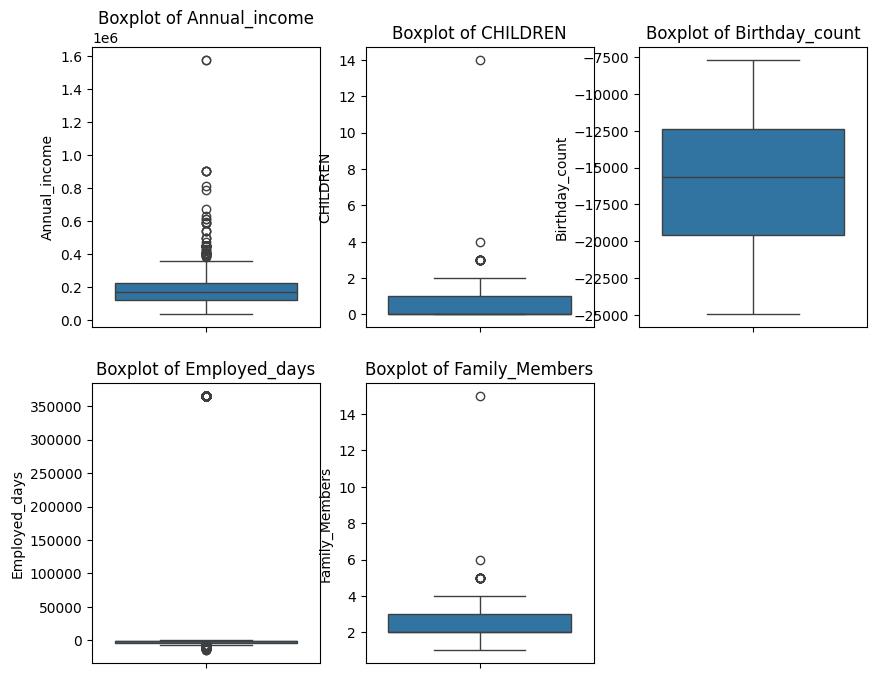

In [ ]:
#boxplot to observe if there are outliers in 'Annual_income', 'CHILDREN', 'Birthday_count', 'Employed_days', and 'Family_Members'.
columns = ['Annual_income','CHILDREN','Birthday_count','Employed_days','Family_Members']
plt.figure(figsize=(10,8))
for i,col in enumerate(columns,1):
    plt.subplot(2,3,i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

**Upon reviewing the data format, it can be observed that:**
1. Ind_ID should be in object format.
2. GENDER, Annual_income, Birthday_count, and Type_Occupation contain missing values.
*  2.1 For GENDER, fill missing values with the mode.
*  2.2 For Annual_income and Birthday_count, fill missing values with the median.
* 2.3 Fill missing values in Type_Occupation with "Unknown".


 ---
**Outlier Analysis:**

3. Annual_income: Although there are some income values higher than the majority, these values are plausible in real life and hence can be considered non-outliers.

*   3.2 CHILDREN: There exists a data point with an exceptionally high value, which might be an outlier.

* 3.3 Birthday_count: There doesn't seem to be any obvious outliers in this column.
* 3.4 Employed_days: There is a data point with a significantly higher value compared to others, which might represent a placeholder or a special case (e.g., retirement). Further consideration is needed on how to handle this value.

* 3.5 Family_Members: There exists a data point with an exceptionally high value, which might be an outlier. Although considering 3.2, we might not consider this value as an outlier, for subsequent model analysis, it needs to be corrected along with the extreme value in 3.2.












**Data processing**

In [ ]:
#Convert 'Ind_ID' to object format:
df['Ind_ID'] = df['Ind_ID'].astype(str)

#Fills missing values in the 'GENDER' column with the mode
gender_mode = df['GENDER'].mode()[0]
df['GENDER'].fillna(gender_mode, inplace=True)

#Fills missing values in the 'Annual_income' and 'Birthday_count' columns with the median of each respective column.
annual_income_median = df['Annual_income'].median()
birthday_count_median = df['Birthday_count'].median()
df['Annual_income'].fillna(annual_income_median, inplace=True)
df['Birthday_count'].fillna(birthday_count_median, inplace=True)

#Fills missing values in the 'Type_Occupation' column with 'Unknown'.
df['Type_Occupation'].fillna('Unknown', inplace=True)

#Check Missing Values:
df.isna().sum()


Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [ ]:
# Find the second largest value in the 'CHILDREN' column
second_largest_children = df['CHILDREN'].nlargest(2).iloc[-1]

# Replace the outlier value (14) in the 'CHILDREN' column with the second largest value
df.loc[df['CHILDREN'] == 14, 'CHILDREN'] = second_largest_children

# Find the second largest value in the 'Family_Members' column
second_largest_family = df['Family_Members'].nlargest(2).iloc[-1]

# Replace the outlier value (15) in the 'Family_Members' column with the second largest value
df.loc[df['Family_Members'] == 15, 'Family_Members'] = second_largest_family


**conclusion**: By doing this, the code aims to handle outliers in these two columns by replacing them with values that are closer to the rest of the data distribution, which helps prevent skewing of the analysis or models built on this data.








In [ ]:
# Convert 'Birthday_count' to 'Age'
df['Age'] = (df['Birthday_count'] / 365).astype(int)  # Convert days to years and cast to integer
df['Age'] = df['Age'].abs()  # Take absolute value to handle negative ages

# Drop 'Birthday_count' column
df.drop('Birthday_count', axis=1, inplace=True)


In [ ]:
# Filter out positive values in the 'Employed_days' column
positive_employed_days = df[df['Employed_days'] > 0]['Employed_days']

# Describe the statistics of positive employed days
positive_employed_days.describe()


count       261.0
mean     365243.0
std           0.0
min      365243.0
25%      365243.0
50%      365243.0
75%      365243.0
max      365243.0
Name: Employed_days, dtype: float64

**concluison:** It can be observed that all positive values in the 'Employed_days' column are 365243. It can be boldly speculated that this is a special case rather than data anomalies. Next, we will continue to explore this type of value.

**filtering**

In [ ]:
# Filter rows where 'Employed_days' is equal to 365243 and select specific columns
positive_employed_data = df[df['Employed_days'] == 365243][['Type_Income', 'Type_Occupation', 'Annual_income']]

# Count occurrences of different values in 'Type_Income' and 'Type_Occupation' columns
type_income_counts = positive_employed_data['Type_Income'].value_counts()
type_occupation_counts = positive_employed_data['Type_Occupation'].value_counts()

type_income_counts, type_occupation_counts


(Pensioner    261
 Name: Type_Income, dtype: int64,
 Unknown    261
 Name: Type_Occupation, dtype: int64)

**conclusion**: By doing this, we can explore the distribution of 'Type_Income' and 'Type_Occupation' for the rows where 'Employed_days' is equal to 365243 and potentially gain insights into this special case.

* For all 261 positive value records, the 'Type_Income' is consistently "Pensioner", indicating retirees.
* Similarly, the 'Type_Occupation' for all these records is consistently "Unknown".

In [ ]:
# Replace 'Unknown' in 'Type_Occupation' with 'Pensioner' for records where 'Employed_days' is 365243
df.loc[df['Employed_days'] == 365243, 'Type_Occupation'] = 'Pensioner'

# Create a new binary feature "Is_Retired", where retired individuals are set to 1, and others to 0
df['Is_Retired'] = (df['Employed_days'] == 365243).astype(int)

# Set positive values in 'Employed_days' to 0 since retired individuals are not employed
df.loc[df['Employed_days'] == 365243, 'Employed_days'] = 0


**Conversion & Drop**

In [ ]:
# Convert 'Employed_days' to 'Employed_years'
df['Employed_years'] = (df['Employed_days'] / 365).astype(int)  # Convert days to years and cast to integer
df['Employed_years'] = df['Employed_years'].abs()  # Take absolute value to handle negative values

# Drop 'Employed_days' column
df.drop('Employed_days', axis=1, inplace=True)


In [ ]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Is_Retired,Employed_years
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,Pensioner,2,1,51,1,0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Unknown,2,1,37,0,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Unknown,2,1,42,0,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Unknown,2,1,37,0,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Unknown,2,1,37,0,1


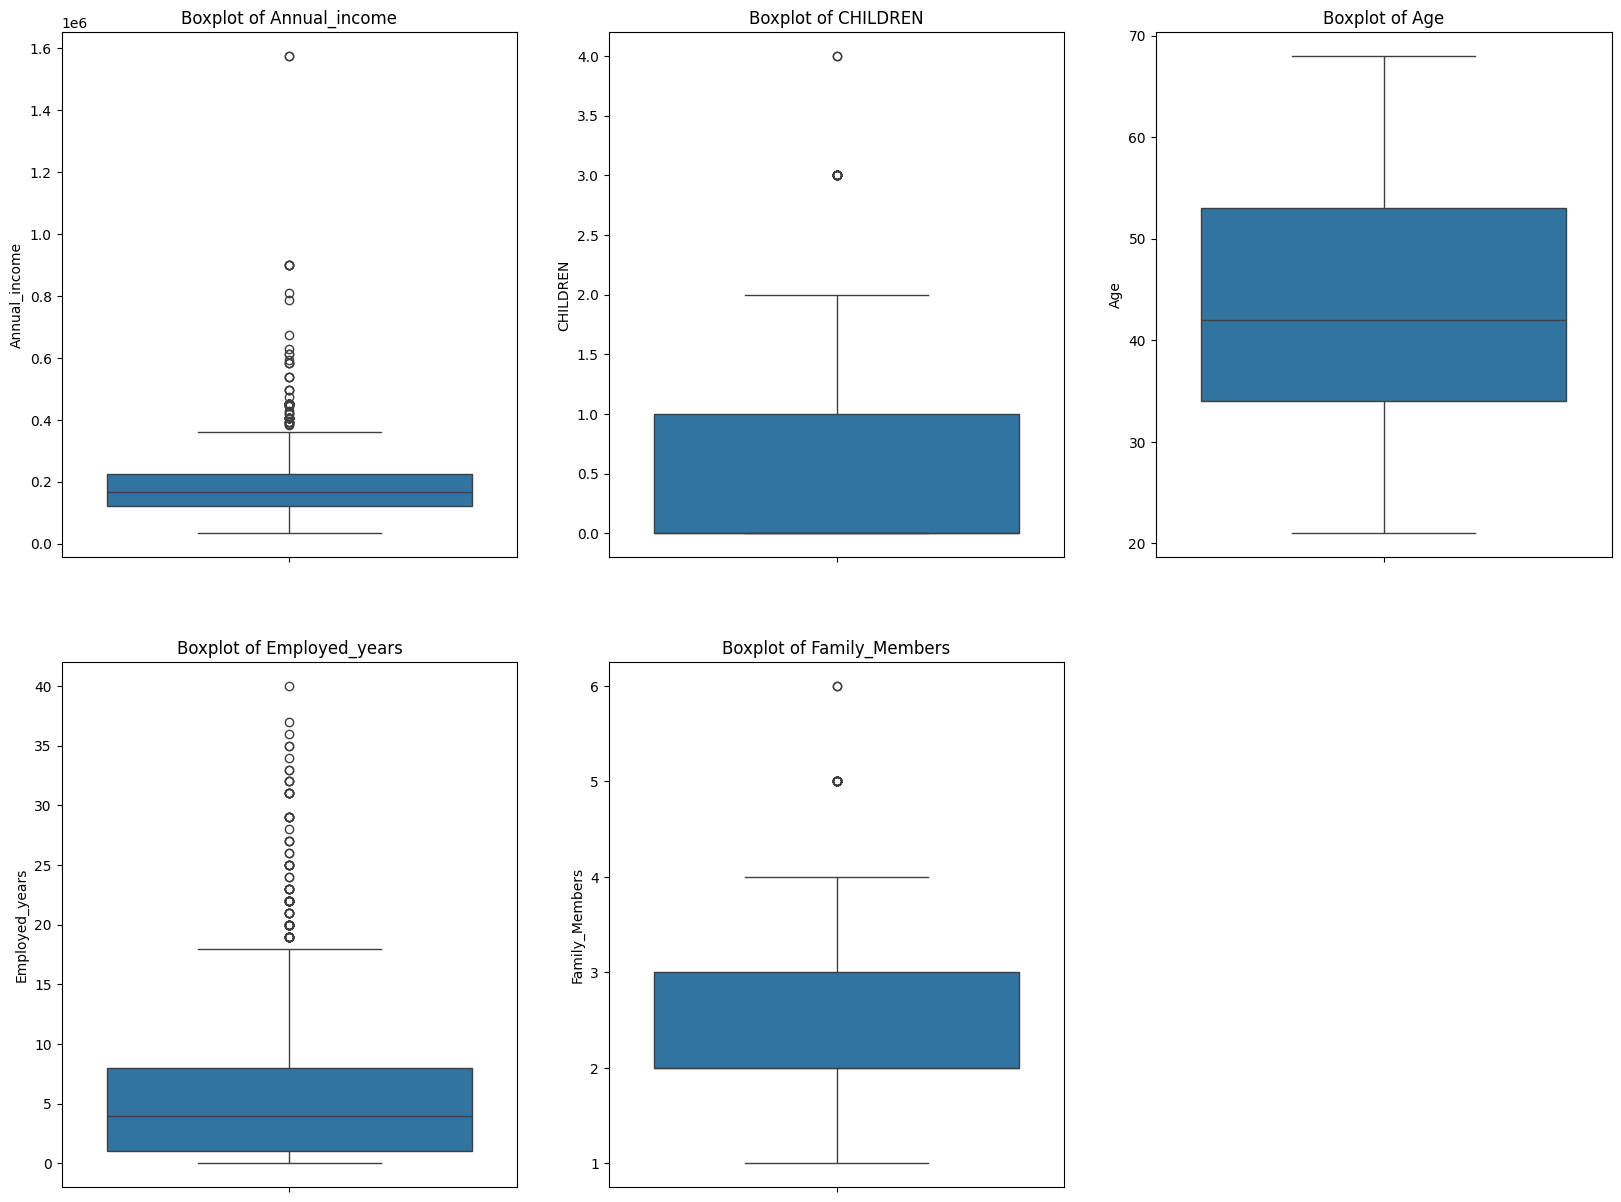

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['Annual_income', 'CHILDREN', 'Age', 'Employed_years', 'Family_Members']
plt.figure(figsize=(20, 15))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.show()


## **Exploratory Data Analysis**

In [ ]:
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Is_Retired,Employed_years
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,Pensioner,2,1,51,1,0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Unknown,2,1,37,0,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Unknown,2,1,42,0,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Unknown,2,1,37,0,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Unknown,2,1,37,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,166500.0,Commercial associate,Higher education,Married,House / apartment,1,0,0,0,Managers,2,0,32,0,5
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,1,0,0,0,Accountants,1,0,28,0,3
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,1,0,0,0,Managers,4,0,36,0,6
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,1,0,Drivers,2,0,41,0,1


<ipython-input-23-99cac369d312>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='label', palette="Blues_d")


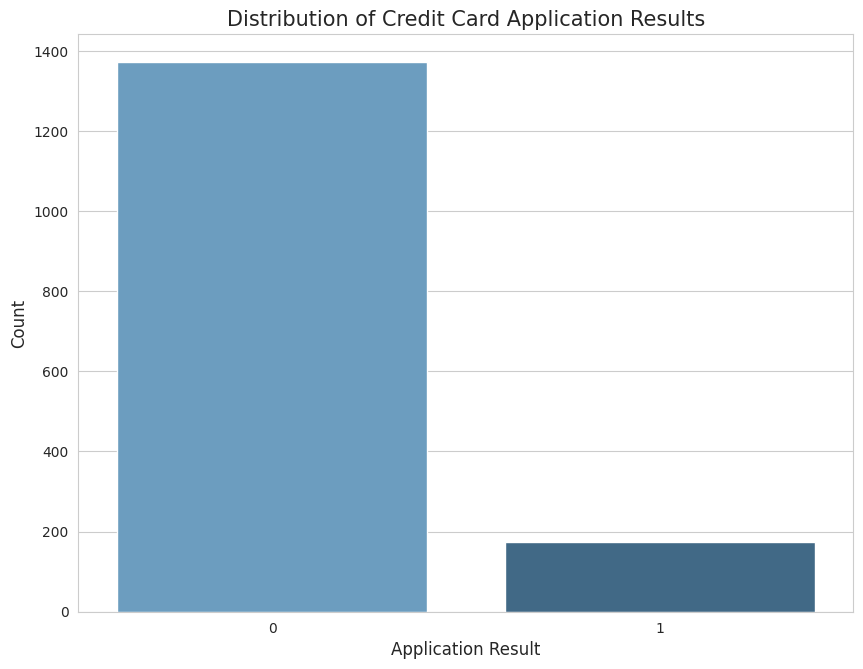

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(10, 7.5))
ax = sns.countplot(data=df, x='label', palette="Blues_d")
plt.title('Distribution of Credit Card Application Results', fontsize=15)
plt.xlabel('Application Result', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()


**Reading:**  From the above plot, we can observe that the majority of credit card applications are approved, with only a small portion being denied. Due to this imbalance in the dataset, it's important to consider this situation when building predictive models in subsequent steps.

# **Visualization**

**Numerical Variable visualization using Histogram.**

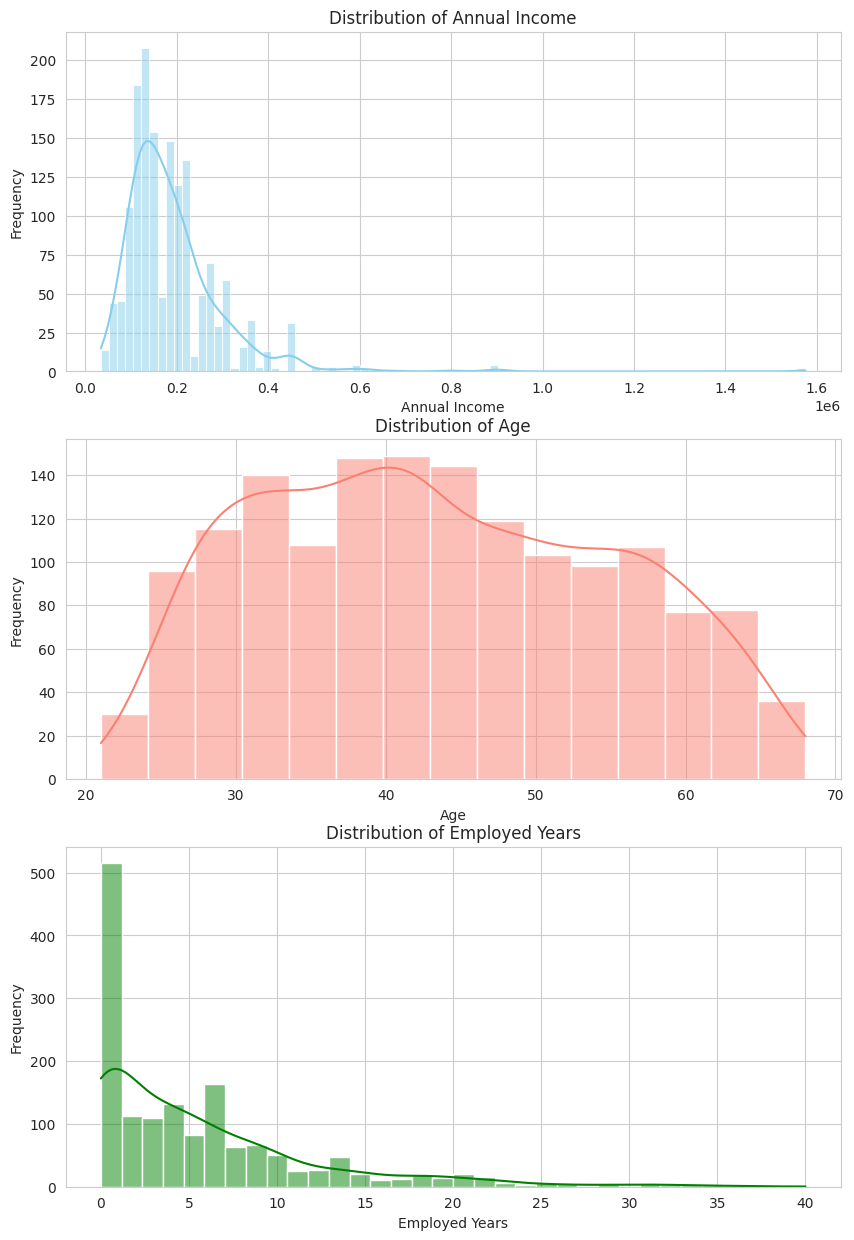

In [ ]:

# Set the style
sns.set_style("whitegrid")

# subplots for the three variables
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot 1: Annual_income
sns.histplot(df['Annual_income'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Annual Income')
axes[0].set_xlabel('Annual Income')
axes[0].set_ylabel('Frequency')

# Plot 2: Age
sns.histplot(df['Age'], kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Distribution of Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

# Plot 3: Employed_years
sns.histplot(df['Employed_years'], kde=True, color='green', ax=axes[2])
axes[2].set_title('Distribution of Employed Years')
axes[2].set_xlabel('Employed Years')
axes[2].set_ylabel('Frequency')


# Show plots
plt.show()


**Categorical Variable visualization  using box plot**

<ipython-input-25-82da37a20c81>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='GENDER', palette="Blues_d", order=df['GENDER'].value_counts().index)
<ipython-input-25-82da37a20c81>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Type_Income', palette="Blues_d", order=df['Type_Income'].value_counts().index)
<ipython-input-25-82da37a20c81>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='EDUCATION', palette="Blues_d", order=df['EDUCATION'].value_counts().index)


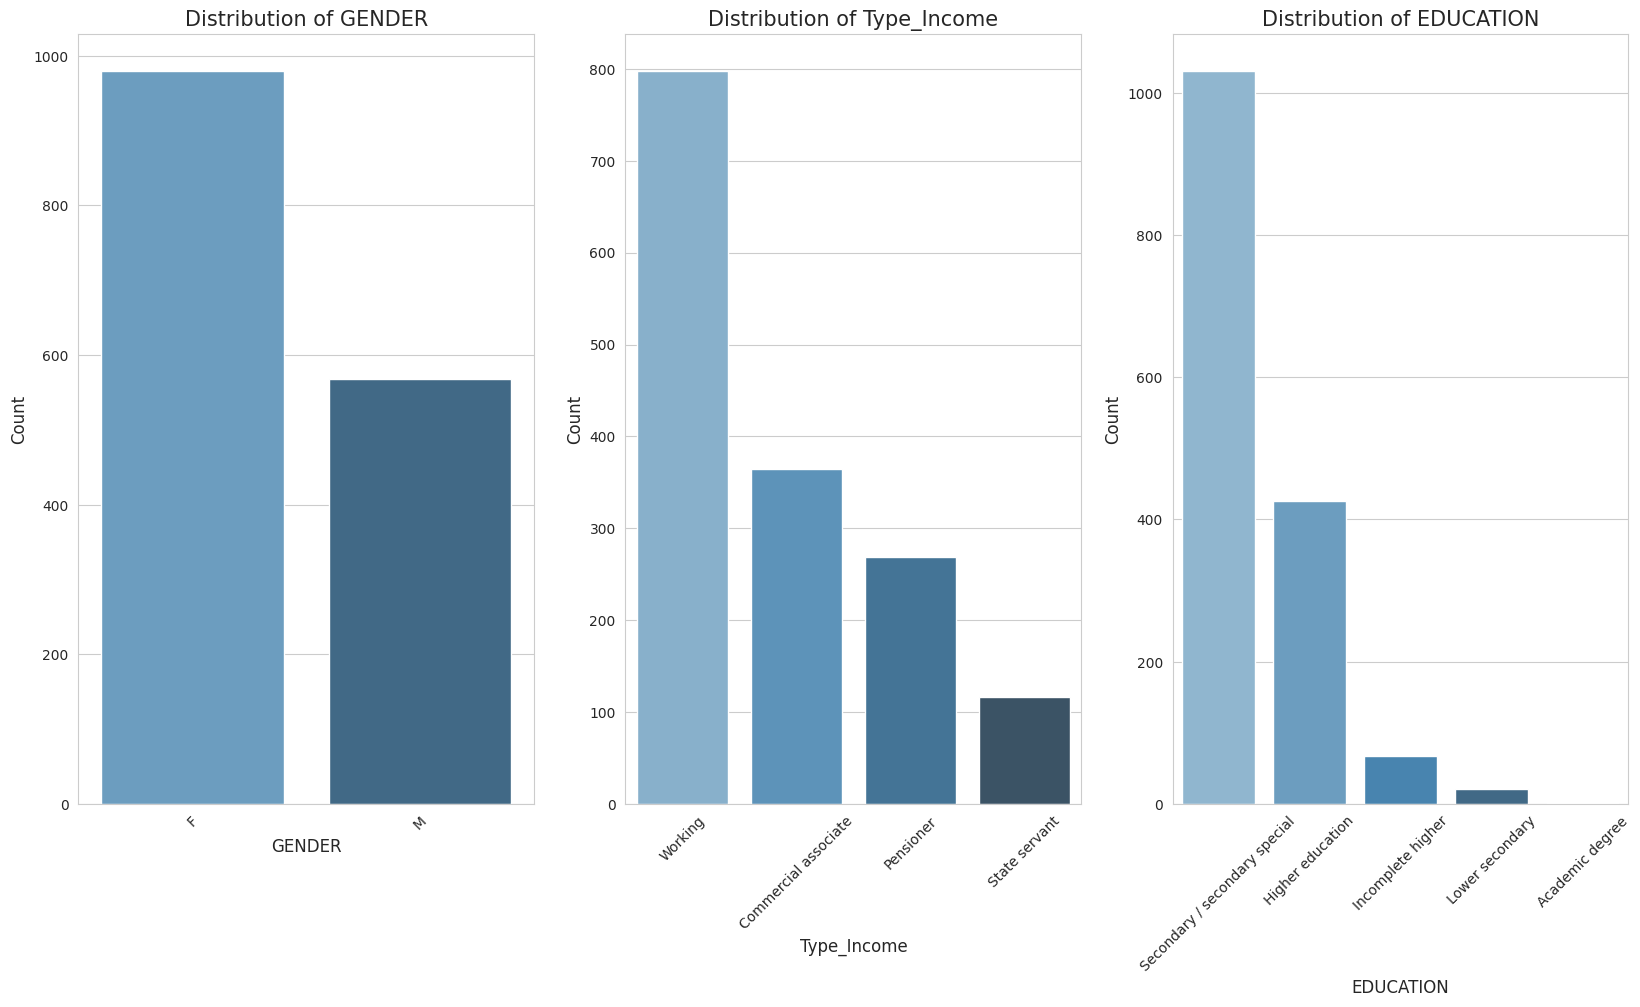

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = ['GENDER', 'Type_Income', 'EDUCATION']

plt.figure(figsize=(20, 10))

# Plotting the distribution of GENDER
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='GENDER', palette="Blues_d", order=df['GENDER'].value_counts().index)
plt.title('Distribution of GENDER', fontsize=15)
plt.xlabel('GENDER', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Plotting the distribution of Type_Income
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='Type_Income', palette="Blues_d", order=df['Type_Income'].value_counts().index)
plt.title('Distribution of Type_Income', fontsize=15)
plt.xlabel('Type_Income', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Plotting the distribution of EDUCATION
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='EDUCATION', palette="Blues_d", order=df['EDUCATION'].value_counts().index)
plt.title('Distribution of EDUCATION', fontsize=15)
plt.xlabel('EDUCATION', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


**Visulaization of Relationship**

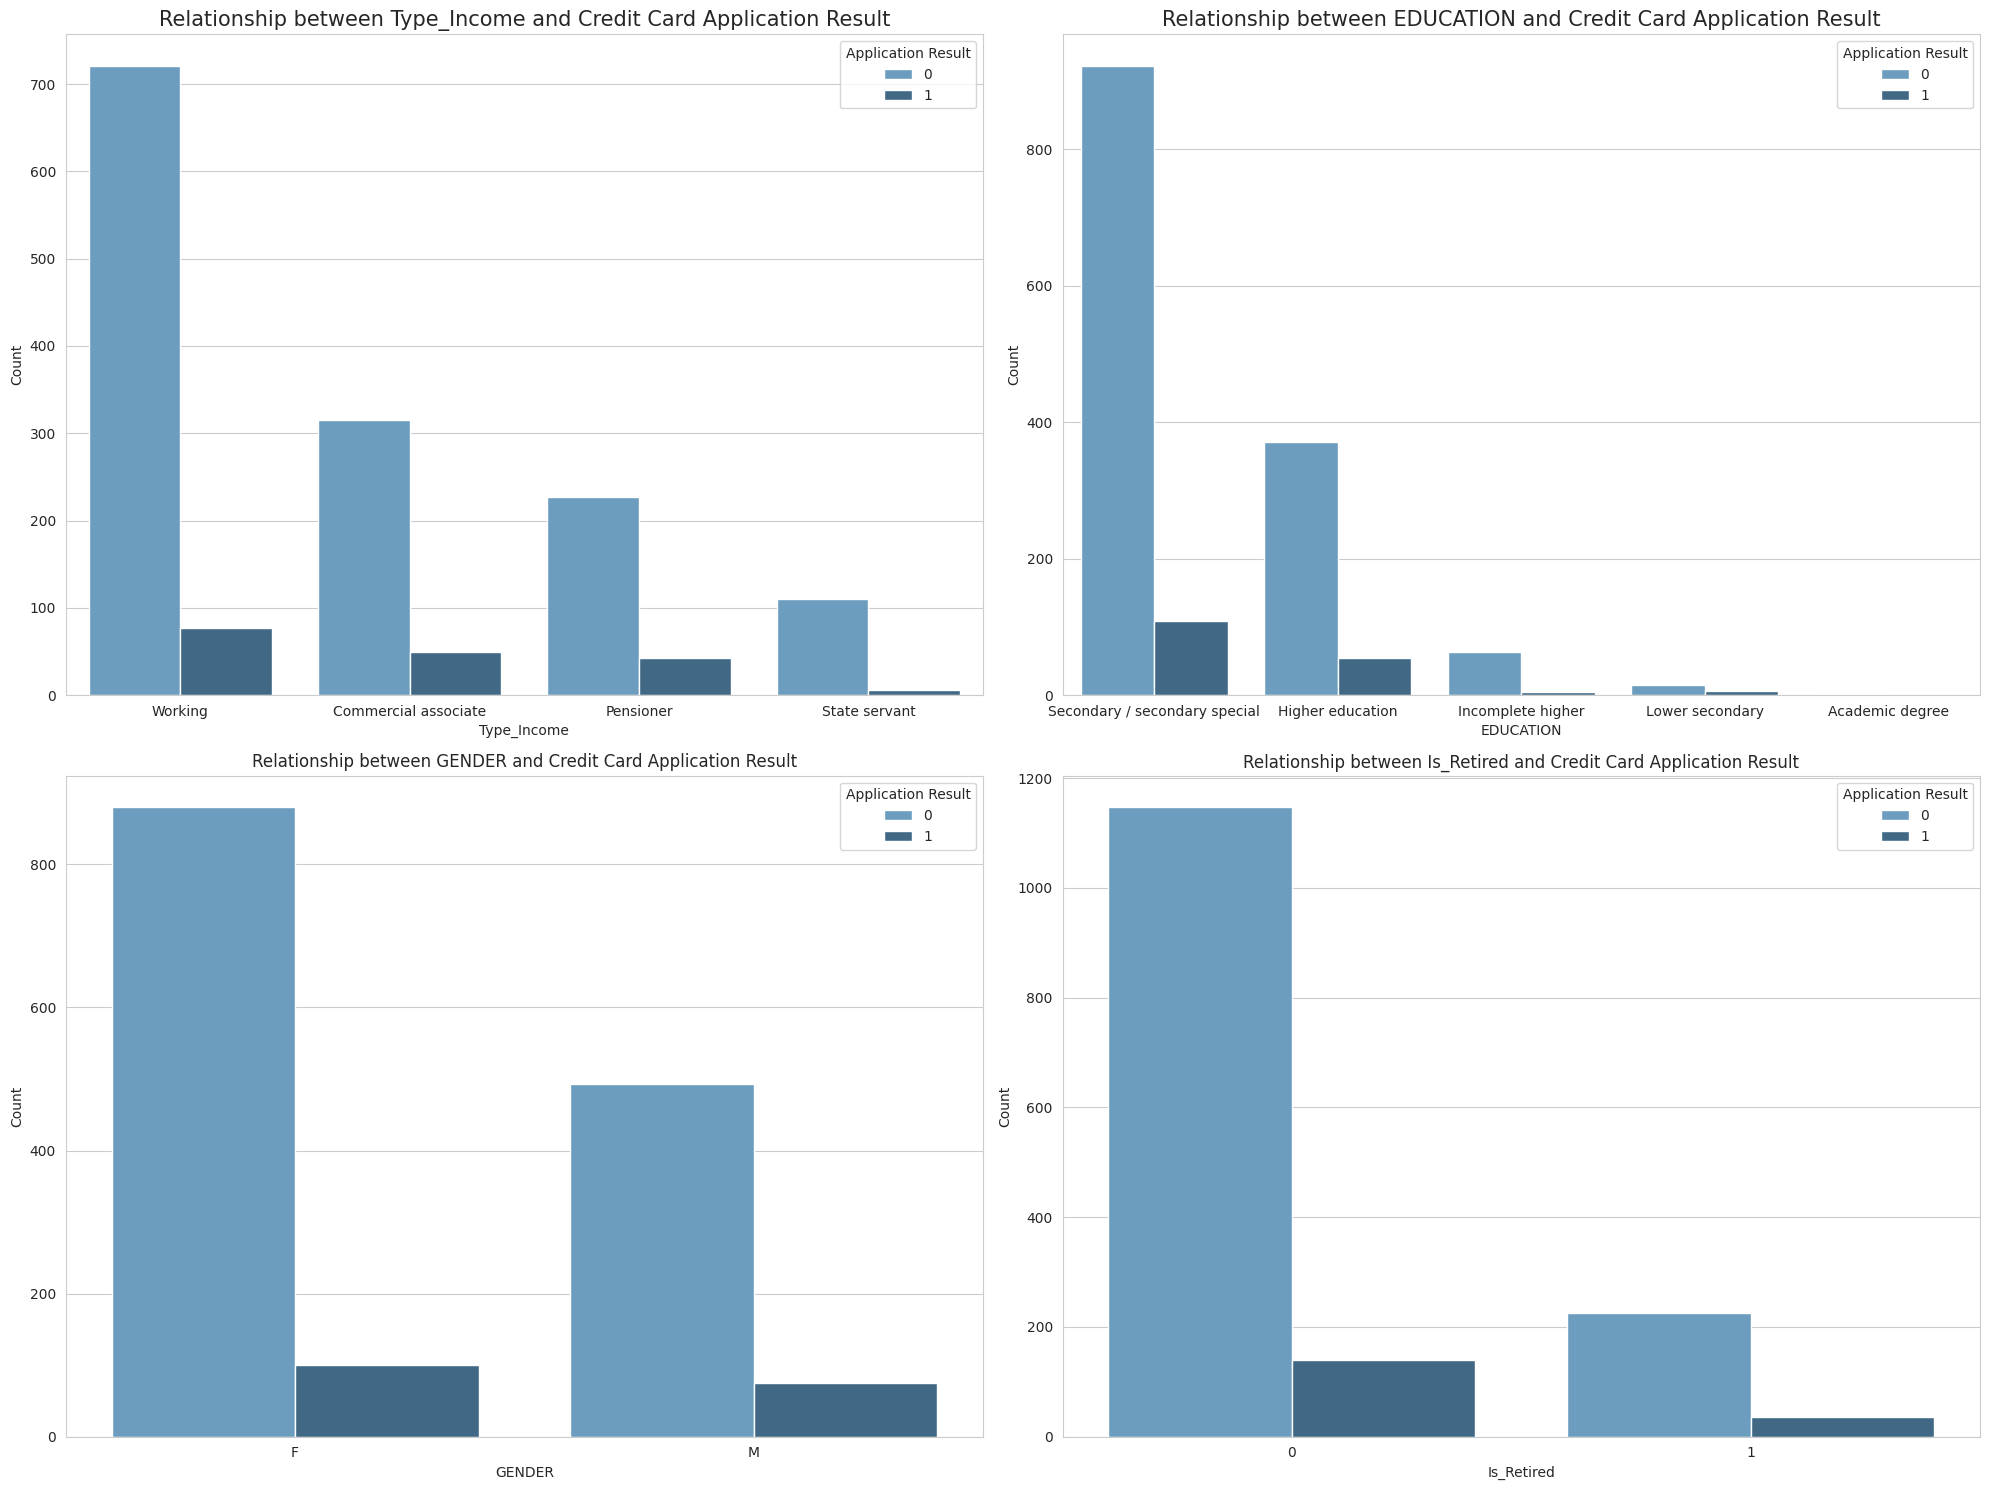

In [ ]:

relationship_columns = ['Type_Income', 'EDUCATION', 'GENDER', 'Is_Retired']

plt.figure(figsize=(20, 15))

# Plotting the relationship between Type_Income and credit card application result
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Type_Income', hue='label', palette="Blues_d", order=df['Type_Income'].value_counts().index)
plt.title('Relationship between Type_Income and Credit Card Application Result', fontsize=15)
plt.xlabel('Type_Income')
plt.ylabel('Count')
plt.legend(title='Application Result')

# Plotting the relationship between EDUCATION and credit card application result
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='EDUCATION', hue='label', palette="Blues_d", order=df['EDUCATION'].value_counts().index)
plt.title('Relationship between EDUCATION and Credit Card Application Result', fontsize=15)
plt.xlabel('EDUCATION')
plt.ylabel('Count')
plt.legend(title='Application Result')

# Plotting the relationship between GENDER and credit card application result
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='GENDER', hue='label', palette="Blues_d", order=df['GENDER'].value_counts().index)
plt.title('Relationship between GENDER and Credit Card Application Result')
plt.xlabel('GENDER')
plt.ylabel('Count')
plt.legend(title='Application Result')

# Plotting the relationship between Is_Retired and credit card application result
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='Is_Retired', hue='label', palette="Blues_d", order=df['Is_Retired'].value_counts().index)
plt.title('Relationship between Is_Retired and Credit Card Application Result')
plt.xlabel('Is_Retired')
plt.ylabel('Count')

plt.legend(title='Application Result')

plt.tight_layout()
plt.show()



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   object 
 1   GENDER           1548 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1548 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Mobile_phone     1548 non-null   int64  
 11  Work_Phone       1548 non-null   int64  
 12  Phone            1548 non-null   int64  
 13  EMAIL_ID         1548 non-null   int64  
 14  Type_Occupation  1548 non-null   object 
 15  Family_Members   1548 non-null   int64  
 16  label            1548 non-null   int64  
 17  Age           

**Prediction Of Credit Card Application Results**

**Data Preparation**

* Feature Engineering
* Feature Selection
* Replacing the value
* Feature Encoding


---
* Drop the 'Ind_ID' column as it's not useful for the model.
* Replace 'Y' with 1 and 'N' with 0 for binary categorical variables.
* Replace 'M' with 0 and 'F' with 1 for gender.
* Convert the 'EDUCATION' column into ordinal encoding based on the provided mapping.



In [ ]:
# Drop 'Ind_ID' because it doesn't help the model
df.drop(columns=['Ind_ID'], axis=1, inplace=True)

# Replace all 'Y' with 1, and all 'N' with 0
df.replace({'Y': 1, 'N': 0}, inplace=True)

# Replace 'M' with 0, and 'F' with 1 for gender
df.replace({'M': 0, 'F': 1}, inplace=True)

# Process the 'EDUCATION' column by converting it to ordinal encoding
education_mapping = {
    'Lower secondary': 0,
    'Secondary / secondary special': 1,
    'Incomplete higher': 2,
    'Higher education': 3,
    'Academic degree': 4
}
df['EDUCATION'] = df['EDUCATION'].map(education_mapping)


* One-Hot Encoding for Categorical Variables:

* Standardization for Continuous Variables:


---
This code preprocesses the data to make it suitable for machine learning algorithms, ensuring that categorical variables are properly encoded and continuous variables are standardized.


In [ ]:
# Encoding categorical variables (excluding binary and ordinal variables) using one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns
new_data = pd.get_dummies(df, columns=categorical_cols)

# Standardize continuous variables
numerical_cols = ['Annual_income', 'Age', 'Family_Members', 'CHILDREN','EDUCATION']
scaler = StandardScaler()
new_data[numerical_cols] = scaler.fit_transform(new_data[numerical_cols])


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting Features and Target Variable
x = new_data.drop('label', axis=1)
y = new_data['label']

# Stratified Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10, stratify=y)


In [ ]:
x.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Mobile_phone,Work_Phone,Phone,EMAIL_ID,...,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Pensioner,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Unknown,Type_Occupation_Waiters/barmen staff
0,0,1,1,-0.579367,-0.098116,1.555348,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,0,-0.579367,1.102824,1.555348,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,0,-0.579367,1.102824,1.555348,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0,-0.579367,-0.218210,1.555348,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,0,-0.579367,1.102824,1.555348,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

**Oversampling** is a common technique for dealing with imbalanced datasets, where the minority class samples are replicated or new samples are generated to balance the class distribution. This can improve the model's ability to learn from the minority class, thus enhancing overall performance.

In [ ]:

x_minority = x_train[y_train == 1]
y_minority = y_train[y_train == 1]
x_majority = x_train[y_train == 0]
y_majority = y_train[y_train == 0]
x_minority_resampled = resample(x_minority, replace=True, n_samples=len(x_majority), random_state=15)
y_minority_resampled = resample(y_minority, replace=True, n_samples=len(y_majority), random_state=15)
new_x_train = pd.concat([x_majority, x_minority_resampled])
new_y_train = pd.concat([y_majority, y_minority_resampled])

# **Model Representation:**
* "Now that the data has been processed, I'm starting to build models. I plan to build three models: logistic regression, random forest and XGBoost. I will establish evaluation metrics to assess the performance of these models and draw a conclusion in the end."

* **logistic regression**

In [ ]:
logreg = LogisticRegression(random_state=15)
logreg.fit(x_train, y_train)




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=15)

In [ ]:
predictions = logreg.predict(x_test)


In [ ]:
y_pred = logreg.predict(x_test)
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       412
           1       0.00      0.00      0.00        53

    accuracy                           0.88       465
   macro avg       0.44      0.50      0.47       465
weighted avg       0.78      0.88      0.83       465



* **Random Forest**








In [ ]:
rf_clf = RandomForestClassifier(random_state=15)
rf_clf.fit(new_x_train, new_y_train)

RandomForestClassifier(random_state=15)

In [ ]:
from sklearn.metrics import classification_report

y_pred_rf = rf_clf.predict(x_test)
class_report_rf = classification_report(y_test, y_pred_rf)
print(class_report_rf)


              precision    recall  f1-score   support

           0       0.93      0.97      0.95       412
           1       0.67      0.45      0.54        53

    accuracy                           0.91       465
   macro avg       0.80      0.71      0.75       465
weighted avg       0.90      0.91      0.90       465



* **XGBoost**

In [ ]:
xgb_clf = xgb.XGBClassifier(random_state=15, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(new_x_train, new_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=15, ...)

In [ ]:
y_pred_xgb = xgb_clf.predict(x_test)
class_report_xgb = classification_report(y_test, y_pred_xgb)
print(class_report_xgb)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       412
           1       0.51      0.51      0.51        53

    accuracy                           0.89       465
   macro avg       0.72      0.72      0.72       465
weighted avg       0.89      0.89      0.89       465



# **SUMMARY**

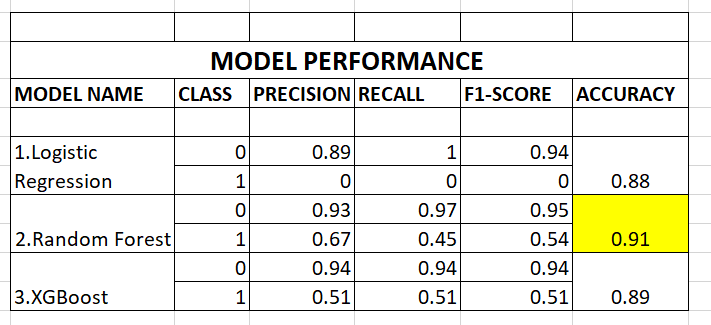

# BRIEF:

* Before optimizing parameters, the Random Forest model performed the best, achieving high levels of accuracy,predictions for class 0.

* XGBoost performed best in terms of recall for class 1 and is also a good model choice.

* Logistic Regression performed comparatively worse than the other models,Therefore, this model is not considered.

Now, we will tune the parameters of the Random Forest and XGBoost to ensure their parameters are as optimal as possible. Parameter tuning is a lengthy process, and we will select commonly used parameter values for optimization. These parameter values may not necessarily be optimal, but they will help us determine a predictive model.








**Parameter optimization**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define a simplified parameter grid
param_grid = {
    'n_estimators': [10, 50],  # Fewer values to test for the number of decision trees
    'max_depth': [None, 10],   # Fewer values to test for the maximum depth
}

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(new_x_train, new_y_train)

print('Best parameters found:', grid_search.best_params_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters found: {'max_depth': None, 'n_estimators': 50}


In [ ]:
best_rf = grid_search.best_estimator_  # Retrieve the best estimator found during grid search
y_pred_orf = best_rf.predict(x_test)   # Make predictions on the test data using the best estimator
class_report_orf = classification_report(y_test, y_pred_orf)  # Generate classification report
print(class_report_orf)  # Print the classification report


              precision    recall  f1-score   support

           0       0.93      0.97      0.95       412
           1       0.69      0.47      0.56        53

    accuracy                           0.92       465
   macro avg       0.81      0.72      0.76       465
weighted avg       0.91      0.92      0.91       465



In [ ]:
#xgboost
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the simplified parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1],  # Fewer values to test for the learning rate
    'n_estimators': [100, 500],    # Fewer values to test for the number of estimators
    'max_depth': [3, 10],          # Fewer values to test for the maximum depth
}

# Create an XGBoost classifier
xgb = XGBClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(new_x_train, new_y_train)

print('Best parameters found:', grid_search.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500}


In [ ]:
best_xgb = grid_search.best_estimator_
y_pred_oxgb = best_xgb.predict(x_test)
class_report_oxgb = classification_report(y_test, y_pred_oxgb)
print(class_report_oxgb)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       412
           1       0.55      0.51      0.53        53

    accuracy                           0.90       465
   macro avg       0.74      0.73      0.74       465
weighted avg       0.89      0.90      0.89       465



**After Parameter Tunning**

* FOR RANDOM FOREST MODEL ACCURACY IS 0.91.
* FOR XGBOOST MODEL ACCURACY IS 0.90

# **feature_importances**


"I have chosen the optimized Random Forest model, which appears to be excellent overall. Of course, the optimized XGBoost model could also be selected, as it is almost as excellent as the Random Forest model after optimization."

In [ ]:
rf_feature_importance = best_rf.feature_importances_  # Get feature importances from the best Random Forest model
feature_names = new_x_train.columns  # we have column names for features
rf_feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_feature_importance
})
sorted_rf_feature_df = rf_feature_df.sort_values(by='Importance', ascending=False).head()  # Select the top five most important features

print(sorted_rf_feature_df)


           Feature  Importance
11             Age    0.161474
4    Annual_income    0.158824
13  Employed_years    0.117709
5        EDUCATION    0.043104
10  Family_Members    0.040172


In the Random Forest model, the most important features are: income > age > years of work > family size > education.

# **SUMMARY**

Summary:

* We performed preliminary data preprocessing, handling missing values and outliers, and constructed new features such as retirement status, age, and years of work.

* We explored the data and visualized the results. For this dataset, the majority of credit card applications were approved, with only a small portion being rejected.

* Income distribution was right-skewed, with most people having low to moderate incomes but some with high incomes.

* Age distribution was close to normal, with fewer people around 20 years old and 70 years old.

* There were more males than females.

* Most people had a working income type, followed by pensioners and commercial associates.

* The majority had a secondary education level, with fewer having higher or lower education levels.

We created profiles for approved and rejected applicants and conducted differential analysis. We found that among approved applicants, the proportion of females was slightly higher, whereas among rejected applicants, the proportion of females was lower than among approved applicants, indicating that male users were relatively more likely to be rejected.

* Applicants with a bachelor's degree had no credit card rejections.

We built multiple models and optimized their parameters. Because the optimized Random Forest model performed well overall, we ultimately chose it.

Through this model, we found that the most important features were income > age > years of work > family size > education.

* This can help the bank's future work, such as prioritizing these features and using the model to predict whether users can be approved for applications, as the optimized Random Forest model achieved an accuracy rate of up to 91%.







# **SQL QUERIES**



---



In [ ]:
import duckdb
conn=duckdb.connect()
conn.register('df',df)


1. Group the customers based on their income type and find the average of their annual income.

In [ ]:
query = """
    SELECT Type_Income, AVG(Annual_income) AS average_income
    FROM df
    GROUP BY Type_Income;
"""
conn.execute(query)

# Fetch the results
results = conn.fetchall()

# Print the results
for row in results:
    print("Income Type:", row[0])
    print("Average Annual Income:", row[1])
    print()


Income Type: Pensioner
Average Annual Income: 155343.4962825279

Income Type: Working
Average Annual Income: 180848.2105263158

Income Type: State servant
Average Annual Income: 211422.41379310345

Income Type: Commercial associate
Average Annual Income: 233107.39726027398



In [ ]:
df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Is_Retired,Employed_years
0,0,1,1,0,180000.0,Pensioner,3,Married,House / apartment,1,0,0,0,Pensioner,2,1,51,1,0
1,1,1,0,0,315000.0,Commercial associate,3,Married,House / apartment,1,1,1,0,Unknown,2,1,37,0,1
2,1,1,0,0,315000.0,Commercial associate,3,Married,House / apartment,1,1,1,0,Unknown,2,1,42,0,1
3,1,1,0,0,166500.0,Commercial associate,3,Married,House / apartment,1,1,1,0,Unknown,2,1,37,0,1
4,1,1,0,0,315000.0,Commercial associate,3,Married,House / apartment,1,1,1,0,Unknown,2,1,37,0,1


2. Find the female owners of cars and property.

In [ ]:
# Replace all 'Y' with 1, and all 'N' with 0
df.replace({1: 'Y',0: 'N'}, inplace=True)

# Replace 'M' with 0, and 'F' with 1 for gender
df.replace({0: 'M', 1: 'F'}, inplace=True)


In [ ]:
df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Is_Retired,Employed_years
0,Male,Y,Y,N,180000.0,Pensioner,3,Married,House / apartment,Y,N,N,N,Pensioner,2,Y,51,Y,N
1,Female,Y,N,N,315000.0,Commercial associate,3,Married,House / apartment,Y,Y,Y,N,Unknown,2,Y,37,N,Y
2,Female,Y,N,N,315000.0,Commercial associate,3,Married,House / apartment,Y,Y,Y,N,Unknown,2,Y,42,N,Y
3,Female,Y,N,N,166500.0,Commercial associate,3,Married,House / apartment,Y,Y,Y,N,Unknown,2,Y,37,N,Y
4,Female,Y,N,N,315000.0,Commercial associate,3,Married,House / apartment,Y,Y,Y,N,Unknown,2,Y,37,N,Y


In [ ]:
import duckdb
conn=duckdb.connect()
conn.register('df',df)

In [ ]:
import duckdb
import pandas as pd

# Assuming you've already connected and registered 'df'

# Write your SQL query
query = """
SELECT
    GENDER,
    Car_Owner,
    Propert_Owner
FROM
    df
WHERE
    GENDER = 'Female' AND (Car_Owner = 'Y' OR Propert_Owner = 'Y');
"""

# Execute the query and fetch the results into a DataFrame
df_result = conn.execute(query).fetch_df()

# Display the DataFrame
print(df_result)


     GENDER Car_Owner Propert_Owner
0    Female         Y             N
1    Female         Y             N
2    Female         Y             N
3    Female         Y             N
4    Female         Y             N
..      ...       ...           ...
730  Female         N             Y
731  Female         N             Y
732  Female         N             Y
733  Female         N             Y
734  Female         N             Y

[735 rows x 3 columns]


3. Find the male customers who are staying with their families.

In [ ]:

query = """
SELECT GENDER, Marital_status
FROM df
WHERE GENDER = 'Male' AND Marital_status = 'Married';
"""

# Execute the query and fetch the results into a DataFrame
df_result = conn.execute(query).fetch_df()

# Display the DataFrame
print(df_result)
print(df_result.count())

    GENDER Marital_status
0     Male        Married
1     Male        Married
2     Male        Married
3     Male        Married
4     Male        Married
..     ...            ...
414   Male        Married
415   Male        Married
416   Male        Married
417   Male        Married
418   Male        Married

[419 rows x 2 columns]
GENDER            419
Marital_status    419
dtype: int64


4. Please list the top five people having the highest income.

In [ ]:
query = """
SELECT GENDER, Annual_income
FROM df
ORDER BY Annual_income DESC
LIMIT 5;

"""

# Execute the query and fetch the results into a DataFrame
df_result = conn.execute(query).fetch_df()

# Display the DataFrame
print(df_result)


   GENDER  Annual_income
0  Female      1575000.0
1  Female      1575000.0
2    Male       900000.0
3    Male       900000.0
4    Male       900000.0


5.How many married people are having bad credit?

In [ ]:
query = """
SELECT  Marital_status, label
FROM df
WHERE Marital_status = 'Married' AND label= 'Y';
"""

# Execute the query and fetch the results into a DataFrame
df_result = conn.execute(query).fetch_df()

# Display the DataFrame
print(df_result.count())
print(f"People who are married and have bad credit score: {df_result}")


Marital_status    114
label             114
dtype: int64
People who are married and have bad credit score:     Marital_status label
0          Married     Y
1          Married     Y
2          Married     Y
3          Married     Y
4          Married     Y
..             ...   ...
109        Married     Y
110        Married     Y
111        Married     Y
112        Married     Y
113        Married     Y

[114 rows x 2 columns]


6. What is the highest education level and what is the total count?

In [ ]:
# # Process the 'EDUCATION' column by converting it to education level from encoded value
# education_mapping = {
#     'Lower secondary': 0,
#     'Secondary / secondary special': 1,
#     'Incomplete higher': 2,
#     'Higher education': 3,
#     'Academic degree': 4
# }
# df['EDUCATION'] = df['EDUCATION'].map(education_mapping)


In [ ]:
query = """
SELECT EDUCATION, COUNT(EDUCATION) AS highest_education
FROM df
GROUP BY EDUCATION
ORDER BY highest_education DESC
LIMIT 5;
"""

# Execute the query and fetch the results into a DataFrame
df_result = conn.execute(query).fetch_df()

# Display the DataFrame
print(df_result)

  EDUCATION  highest_education
0         Y               1031
1         3                426
2         2                 68
3         N                 21
4         4                  2


7. Between married males and females, who is having more bad credit?

In [ ]:
query = """
SELECT GENDER, COUNT(*) AS bad_credit_count
FROM df
WHERE Marital_status = 'Married' AND label = 'Y'
GROUP BY GENDER;
"""

# Execute the query and fetch the results into a DataFrame
df_result = conn.execute(query).fetch_df()

# Display the DataFrame
print(df_result)

   GENDER  bad_credit_count
0    Male                51
1  Female                63




---

